**<font color='orange'>Завдання**</font>
### <font color='#8B2252'>Напишіть код для стиснення зображення з використанням **JPEG**.</font>
### <font color='#8B2252'>Використовуючи бібліотеку **gzip**, напишіть код для стиснення текстового файлу.</font>
### <font color='#8B2252'>Реалізуйте **алгоритм Хаффмана** для стиснення текстових даних:</font>
* <font color='#8B8B00'>напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.</font>


In [1]:
import os # for getting statistic information about a file
import cv2
import pandas as pd
import gzip
from dahuffman import HuffmanCodec
from collections import defaultdict # for counting each symbols in the content.
import heapq # for creating a data structure to form the Huffman tree.
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read an image

The original image Size in Bytes is 7070841
The original image in MegaBytes is 6.7


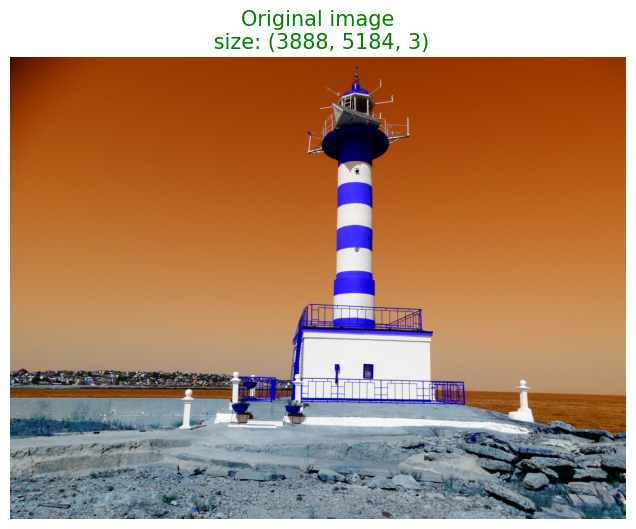

In [2]:
# Get a image size.
img_name = "lighthouse.jpg"
origin_file_stats = os.stat(img_name)

print(f'The original image Size in Bytes is {origin_file_stats.st_size}')
print(f'The original image in MegaBytes is {origin_file_stats.st_size / (1024 * 1024):.1f}')

# Reading a color image.
origin_img = cv2.imread(img_name)

# Visualisation.
plt.figure(figsize=(10, 6))
plt.title(f'Original image\n size: {origin_img.shape}', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_img)
plt.show()

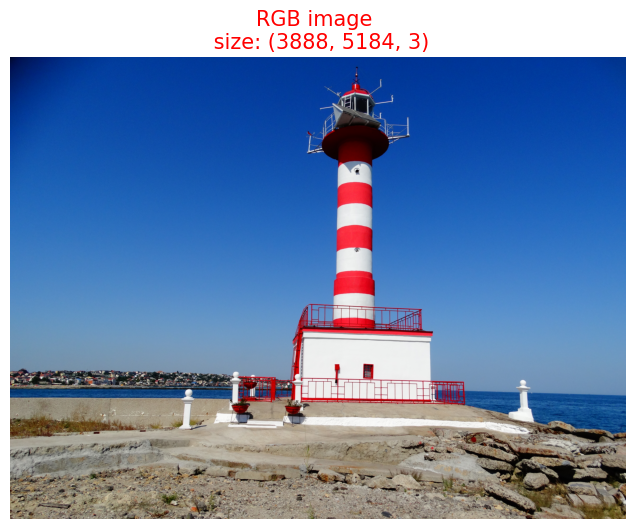

In [3]:
# Converting the origin image to RGB.
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title(f'RGB image \n size: {RGB_img.shape}', fontsize=15, color='r')
plt.axis('off')
plt.imshow(RGB_img)
plt.show()

# JPEG Compression realisation

In [4]:
# Quality of the image after compression.
jpg_quality = 50

# Reading and compressing the image.
cv2.imwrite('compres_img.jpg', RGB_img, [cv2.IMWRITE_JPEG_QUALITY, jpg_quality])
print("Image has been saved Successfully!!")

# Get the image size after saved.
img_name = 'compres_img.jpg'
compres_file_stats = os.stat(img_name)

print(f'The compressed image Size in Bytes is {compres_file_stats.st_size}')
print(f'The compressed image in MegaBytes is {compres_file_stats.st_size / (1024 * 1024):.1f}')

Image has been saved Successfully!!
The compressed image Size in Bytes is 1332502
The compressed image in MegaBytes is 1.3


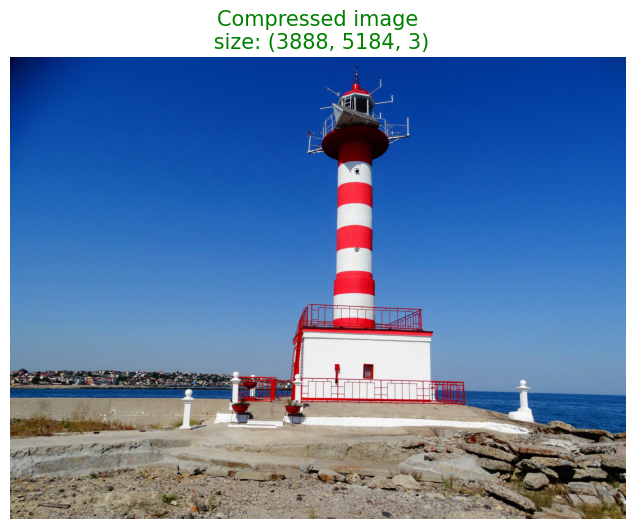

In [5]:
# Reading a color image.
get_img = cv2.imread('compres_img.jpg')

# Visualisation.
plt.figure(figsize=(10, 6))
plt.title(f'Compressed image\n size: {get_img.shape}', fontsize=15, color='g')
plt.axis('off')
plt.imshow(get_img)
plt.show()

# Comparison of images size

In [6]:
# Constructing DataFrame from a dictionary.
data = {'Original size': [f'{origin_file_stats.st_size / (1024 * 1024):.1f}'],
        'Compressed size': [f'{compres_file_stats.st_size / (1024 * 1024):.1f}']}

df = pd.DataFrame(data=data, index=['Mbytes'])
# Display the dataframe.
df

,Original size,Compressed size
Mbytes,6.7,1.3


# GZIP realization

In [30]:
# Creating a content for saving into a GZIP file.
content = b'ZEN of Python:\n' \
          b'Beautiful is better than ugly.\n' \
          b'Explicit is better than implicit.\n' \
          b'Simple is better than complex.\n' \
          b'Complex is better than complicated.\n' \
          b'Flat is better than nested.\n' \
          b'Sparse is better than dense.\n' \
          b'Readability counts.\n' \
          b'Special cases are not special enough to break the rules.\n' \
          b'Although practicality beats purity.\n' \
          b'Errors should never pass silently.\n' \
          b'Unless explicitly silenced.\n' \
          b'In the face of ambiguity, refuse the temptation to guess.\n' \
          b'There should be one-- and preferably only one --obvious way to do it.[a]\n' \
          b'Although that way may not be obvious at first unless you\'re Dutch.\n' \
          b'Now is better than never.\n' \
          b'Although never is often better than right now.[b]\n' \
          b'If the implementation is hard to explain, it\'s a bad idea.\n' \
          b'If the implementation is easy to explain, it may be a good idea.\n' \

# Write the content into a file 'GZIP_file.txt.gz'.
with gzip.open('GZIP_file.txt.gz', 'wb') as f:
    f.write(content)

# Reading the saved file 'GZIP_file.txt.gz'.
with gzip.open('GZIP_file.txt.gz', 'rb') as f:
    file_content = f.read()
    for line in content.splitlines():
        print(line)


# Get a size of the file.
file_name = 'GZIP_file.txt.gz'
file_stats = os.stat(file_name)
print('=======' * 10)
print(f'A size of the file is {file_stats.st_size} Bytes')

b'ZEN of Python:'
b'Beautiful is better than ugly.'
b'Explicit is better than implicit.'
b'Simple is better than complex.'
b'Complex is better than complicated.'
b'Flat is better than nested.'
b'Sparse is better than dense.'
b'Readability counts.'
b'Special cases are not special enough to break the rules.'
b'Although practicality beats purity.'
b'Errors should never pass silently.'
b'Unless explicitly silenced.'
b'In the face of ambiguity, refuse the temptation to guess.'
b'There should be one-- and preferably only one --obvious way to do it.[a]'
b"Although that way may not be obvious at first unless you're Dutch."
b'Now is better than never.'
b'Although never is often better than right now.[b]'
b"If the implementation is hard to explain, it's a bad idea."
b'If the implementation is easy to explain, it may be a good idea.'
A size of the file is 431 Bytes


# Huffman Coding Compression

In [62]:
text_for_encode = 'ZEN of Python:\n' \
          'Beautiful is better than ugly.\n' \
          'Explicit is better than implicit.\n' \
          'Simple is better than complex.\n' \
          'Complex is better than complicated.\n' \
          'Flat is better than nested.\n' \
          'Sparse is better than dense.\n' \
          'Readability counts.\n' \
          'Special cases are not special enough to break the rules.\n' \
          'Although practicality beats purity.\n' \
          'Errors should never pass silently.\n' \
          'Unless explicitly silenced.\n' \
          'In the face of ambiguity, refuse the temptation to guess.\n' \
          'There should be one-- and preferably only one --obvious way to do it.[a]\n' \
          'Although that way may not be obvious at first unless you\'re Dutch.\n' \
          'Now is better than never.\n' \
          'Although never is often better than right now.[b]\n' \
          'If the implementation is hard to explain, it\'s a bad idea.\n' \
          'If the implementation is easy to explain, it may be a good idea.\n'

In [63]:
# Counting symbols in the content.
symbols = defaultdict(int)

# Checking and counting all symbols.
for char in text_for_encode:
    symbols[char] += 1
print(symbols)

defaultdict(<class 'int'>, {'Z': 1, 'E': 3, 'N': 2, ' ': 110, 'o': 38, 'f': 10, 'P': 1, 'y': 16, 't': 72, 'h': 28, 'n': 36, ':': 1, '\n': 19, 'B': 1, 'e': 77, 'a': 46, 'u': 20, 'i': 47, 'l': 32, 's': 38, 'b': 20, 'r': 28, 'g': 9, '.': 18, 'x': 6, 'p': 19, 'c': 15, 'm': 13, 'S': 3, 'C': 1, 'd': 14, 'F': 1, 'R': 1, 'k': 1, 'A': 3, 'v': 5, 'U': 1, 'I': 3, ',': 3, 'T': 1, '-': 4, 'w': 4, '[': 2, ']': 2, "'": 2, 'D': 1})


In [64]:
# Creating Huffman algorithm:

# This symbols will be encoded.
codec = HuffmanCodec.from_frequencies({'Z': 1, 'E': 3, 'N': 2, ' ': 110, 'o': 38, 'f': 10, 'P': 1, 'y': 16, 't': 72, 'h': 28, 'n': 36, ':': 1, '\n': 19, 'B': 1, 'e': 77, 'a': 46, 'u': 20, 'i': 47, 'l': 32, 's': 38, 'b': 20, 'r': 28, 'g': 9, '.': 18, 'x': 6, 'p': 19, 'c': 15, 'm': 13, 'S': 3, 'C': 1, 'd': 14, 'F': 1, 'R': 1, 'k': 1, 'A': 3, 'v': 5, 'U': 1, 'I': 3, ',': 3, 'T': 1, '-': 4, 'w': 4, '[': 2, ']': 2, "'": 2, 'D': 1})

# Encoding symbols.
encoded = codec.encode(content)
print('--- Encoded content ---')
encoded

KeyError: 90

In [65]:
# Decoding the content after Huffman encoded.
print('--- Decode content ---')
print(codec.decode(encoded))

--- Decode content ---
ZEN of Python:
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases are not special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.[a]
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than right now.[b]
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.



In [133]:
# Creating tree nodes
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)


# Main function implementing huffman coding
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d


# Calculating frequency
freq = {}
for c in content:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))

    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 ' '  |         101
 'e'  |         010
 't'  |        1111
 'i'  |        1000
 'a'  |        0111
 'o'  |        0011
 's'  |        0010
 'n'  |       11101
 'l'  |       11100
 'h'  |       11001
 'r'  |       11000
 'u'  |       01101
 'b'  |       01100
 '\n' |       00011
 'p'  |       00010
 '.'  |       00000
 'y'  |      110111
 'c'  |      110101
 'd'  |      110100
 'm'  |      100110
 'f'  |      000011
 'g'  |      000010
 'x'  |     1001110
 'v'  |     1001000
 '-'  |    10011111
 'w'  |    10011110
 'E'  |    10010011
 'S'  |    10010010
 'A'  |    10010101
 'I'  |    10010100
 ','  |    10010111
 'N'  |   110110101
 '['  |   110110100
 ']'  |   110110111
 "'"  |   110110110
 'Z'  |   100101100
 'P'  |  1001011011
 ':'  |  1001011010
 'B'  |  1101100101
 'C'  |  1101100100
 'F'  |  1101100111
 'R'  |  1101100110
 'k'  |  1101100001
 'U'  |  1101100000
 'T'  |  1101100011
 'D'  |  1101100010
